In [27]:
import pandas as pd
import numpy as np  
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import os 

In [2]:
parquet_name = 'data/yellow_taxi_jan_2021_clean.parquet'
taxi_df = pd.read_parquet(parquet_name)

In [3]:
taxi_df.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'drop_off_day', 'drop_off_hour',
       'drop_off_dow', 'pick_up_day', 'pick_up_hour', 'pick_up_dow',
       'duration_minute', 'is_holiday', 'math_check'],
      dtype='object')

In [4]:
print(taxi_df.shape[1])
print(taxi_df.columns)

categorical_cols = ['passenger_count', 'vendorid', 'ratecodeid', 'store_and_fwd_flag','payment_type', 'pulocationid', 'dolocationid','drop_off_day', 'drop_off_hour','drop_off_dow', 'pick_up_day', 'pick_up_hour', 'pick_up_dow','is_holiday']
print(len(categorical_cols))

numeric_cols = ['trip_distance', 'duration_minute', 'total_amount', 'fare_amount', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'mta_tax', 'extra', 'congestion_surcharge', 'math_check']
print(len(numeric_cols))

27
Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'drop_off_day', 'drop_off_hour',
       'drop_off_dow', 'pick_up_day', 'pick_up_hour', 'pick_up_dow',
       'duration_minute', 'is_holiday', 'math_check'],
      dtype='object')
14
11


In [5]:
taxi_df_short = taxi_df.loc[: , ['passenger_count', 'vendorid', 'payment_type', 'drop_off_day', 'drop_off_hour','drop_off_dow','trip_distance', 'duration_minute', 'total_amount', 'fare_amount', 'tip_amount','is_holiday']]
taxi_df_short.head()

,passenger_count,vendorid,payment_type,drop_off_day,drop_off_hour,drop_off_dow,trip_distance,duration_minute,total_amount,fare_amount,tip_amount,is_holiday
0,1.0,1,2,1,0,4,2.10,6,11.80,8.0,0.00,True
1,1.0,1,2,1,0,4,0.20,1,4.30,3.0,0.00,True
2,1.0,1,1,1,1,4,14.70,28,51.95,42.0,8.65,True
3,0.0,1,1,1,0,4,10.60,15,36.35,29.0,6.05,True
4,1.0,2,1,1,0,4,4.94,17,24.36,16.5,4.06,True


In [6]:
taxi_df_short.describe().round(2)

,passenger_count,vendorid,payment_type,drop_off_day,drop_off_hour,drop_off_dow,trip_distance,duration_minute,total_amount,fare_amount,tip_amount
count,1263098.00,1263098.00,1263098.00,1263098.00,1263098.00,1263098.00,1263098.00,1263098.00,1263098.00,1263098.00,1263098.00
mean,1.41,1.68,1.27,16.52,13.96,2.98,2.61,13.41,16.49,11.05,1.94
std,1.06,0.47,0.47,8.64,4.58,1.90,3.35,64.16,11.35,9.70,2.28
min,0.00,1.00,1.00,1.00,0.00,0.00,0.00,-4.00,0.00,0.00,0.00
25%,1.00,1.00,1.00,9.00,11.00,1.00,0.99,5.00,10.70,6.00,0.00
50%,1.00,2.00,1.00,16.00,14.00,3.00,1.61,9.00,13.50,8.00,1.86
75%,1.00,2.00,2.00,24.00,17.00,5.00,2.80,14.00,17.80,12.00,2.70
max,8.00,2.00,4.00,31.00,23.00,6.00,167.08,28818.00,485.80,484.00,333.00


In [7]:
taxi_df_short[taxi_df_short['total_amount'] > 17.80].shape[0]

314218

485.8


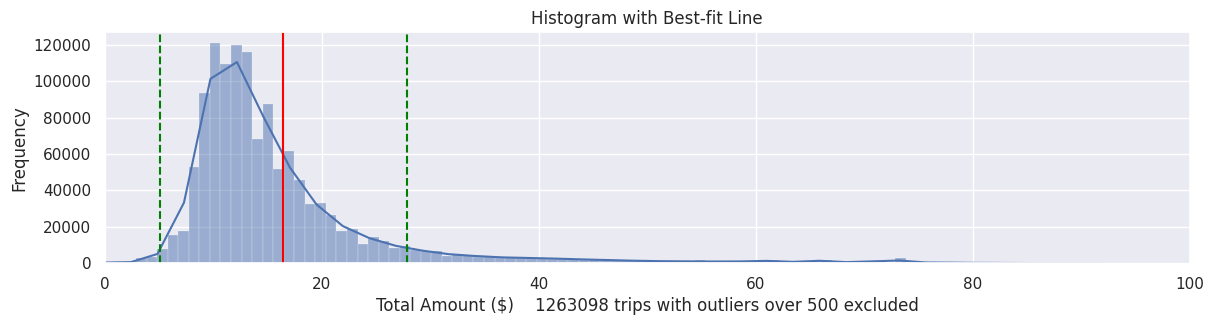

In [36]:
print(taxi_df_short['total_amount'].max())
# Plot the histogram

plt.figure(figsize=(14, 3))

taxi_var = taxi_df_short['total_amount']
sns.histplot(taxi_var, bins=500, kde=True)

plt.xlim(0, 100)

plt.axvline(taxi_var.mean(), color='red', label='Mean')
plt.axvline(taxi_var.mean() - taxi_var.std(), color='green', linestyle='--', label='Std Dev')
plt.axvline(taxi_var.mean() + taxi_var.std(), color='green', linestyle='--')

# Add labels and a title
plt.xlabel("Total Amount ($)    {0} trips with outliers over 500 excluded".format(taxi_df_short.shape[0]))
plt.ylabel("Frequency")
plt.title("Histogram with Best-fit Line")

# Show the plot
plt.show()

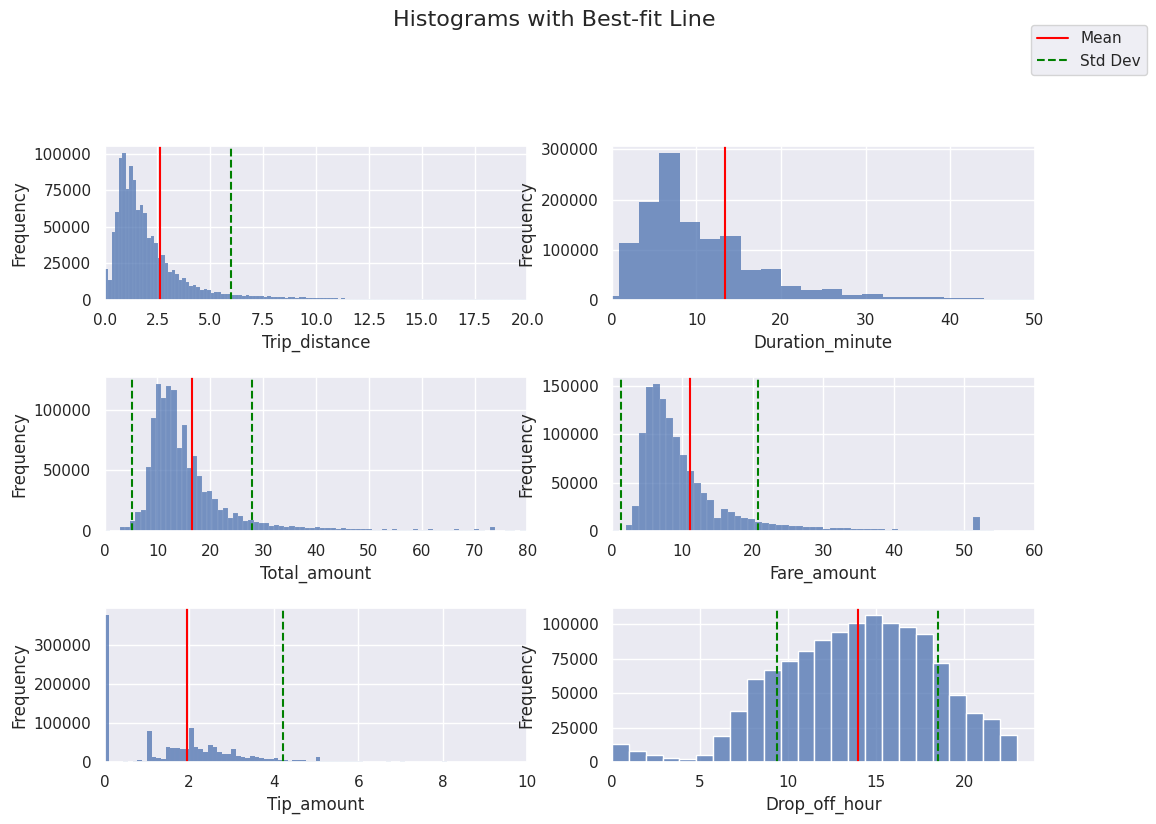

In [49]:
taxi_df_plot = taxi_df.loc[: , ['trip_distance', 'duration_minute', 'total_amount', 'fare_amount', 'tip_amount','drop_off_hour']]
xlims = [(0, 20), (0, 50), (0, 80), (0, 60), (0, 10), (0, 24)]
bins = [1000, 12000, 500, 500, 3000, 24]

fig, axs = plt.subplots(3, 2, figsize=(12, 8))

for i, column in enumerate(taxi_df_plot.columns):
    taxi_var = taxi_df_plot[column]
    mean = taxi_var.mean()
    std_dev = taxi_var.std()
    
    row = i // 2
    col = i % 2
    
    sns.histplot(taxi_var, bins=bins[i], ax=axs[row, col])
    
    # axs[row, col].set_title(column.capitalize())
    axs[row, col].set_xlim(xlims[i])  # Use set_xlim() to limit the x-axis
    
    axs[row, col].axvline(mean, color='red', label='Mean')
    axs[row, col].axvline(mean - std_dev, color='green', linestyle='--', label='Std Dev')
    axs[row, col].axvline(mean + std_dev, color='green', linestyle='--')
    
    # Add labels and a title
    axs[row, col].set_xlabel(column.capitalize())
    axs[row, col].set_ylabel("Frequency")
    #axs[row, col].set_title("Histogram with Best-fit Line")

# Add a single legend for all four plots
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1, 1), loc='right', ncol=1)

# Add a title for the whole figure
fig.suptitle("Histograms with Best-fit Line", fontsize=16, y=1.05)

# Add some padding between the subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()


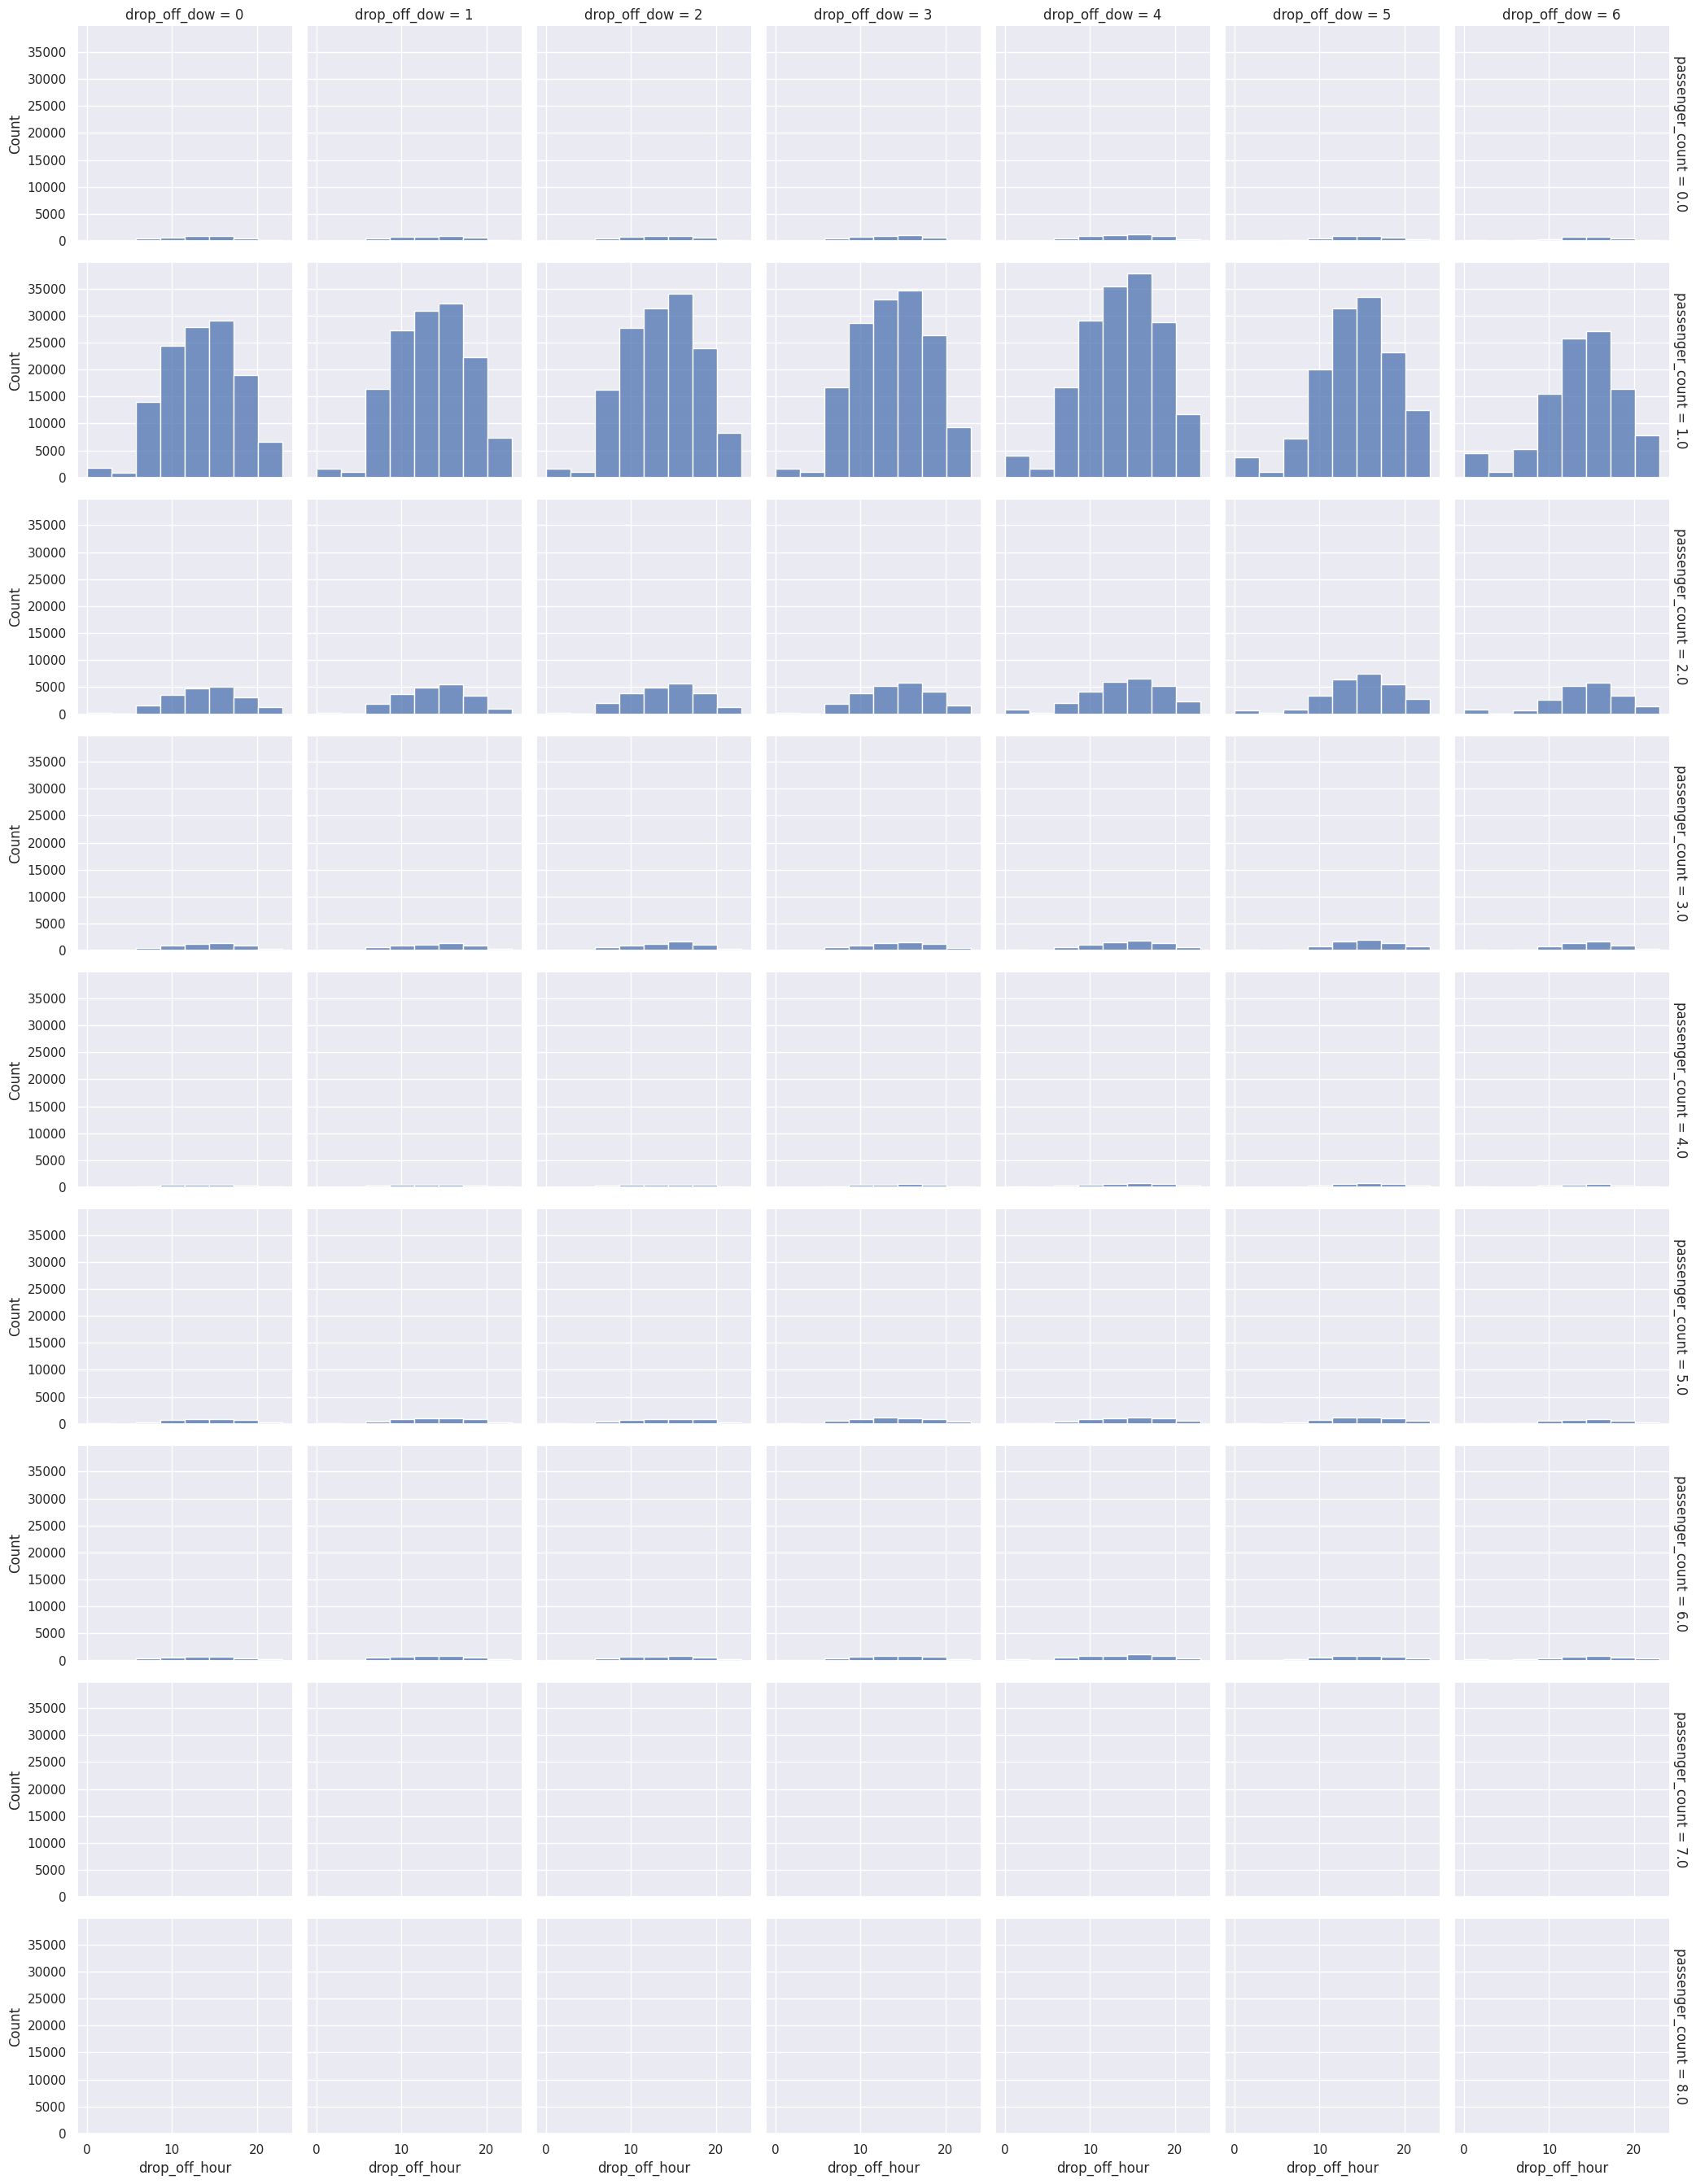

In [55]:
sns.set_theme(style="darkgrid")
sns.displot(
    taxi_df_short, x="drop_off_hour", col="drop_off_dow", row="passenger_count",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

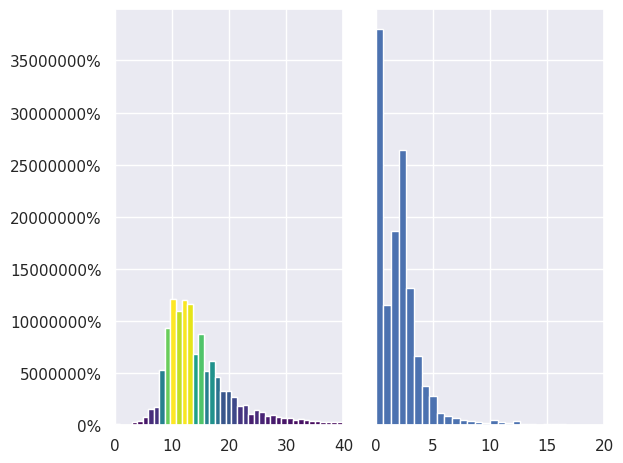

In [34]:

dist1 = taxi_df_short['total_amount']
dist2 = taxi_df_short['tip_amount']

n_bins = 500

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)

# Set x-axis limits for both subplots
x_axis_limits = (0, 50)  # Adjust the range as needed
axs[0].set_xlim(0, 40)
axs[1].set_xlim(0, 20)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(dist1, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(dist1, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

In [11]:
day_of_week_avg = taxi_df_short.groupby('drop_off_dow')['total_amount'].mean().reset_index()
day_of_week_avg.shape

(7, 2)

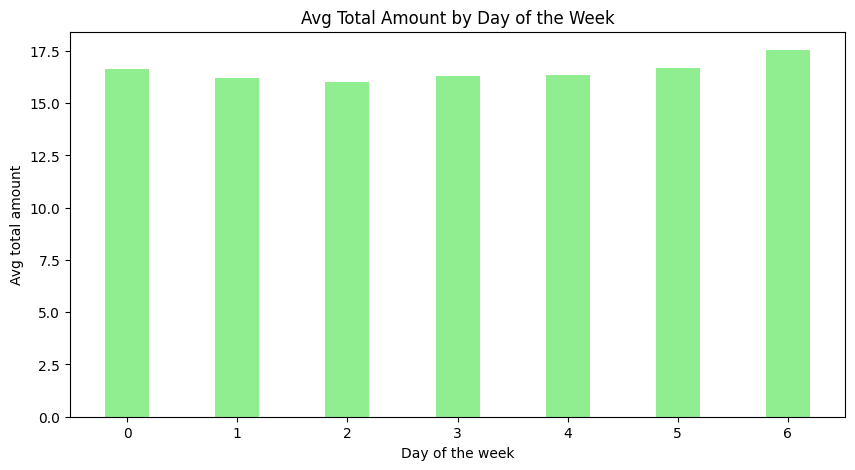

In [12]:
fig = plt.figure(figsize = (10, 5))
day_of_week_avg = taxi_df_short.groupby('drop_off_dow')['total_amount'].mean().reset_index()
 
# creating the bar plot
plt.bar(day_of_week_avg['drop_off_dow'], day_of_week_avg['total_amount'], color ='lightgreen', 
        width = 0.4)
 
plt.xlabel("Day of the week")
plt.ylabel("Avg total amount")
plt.title("Avg Total Amount by Day of the Week")
plt.show()

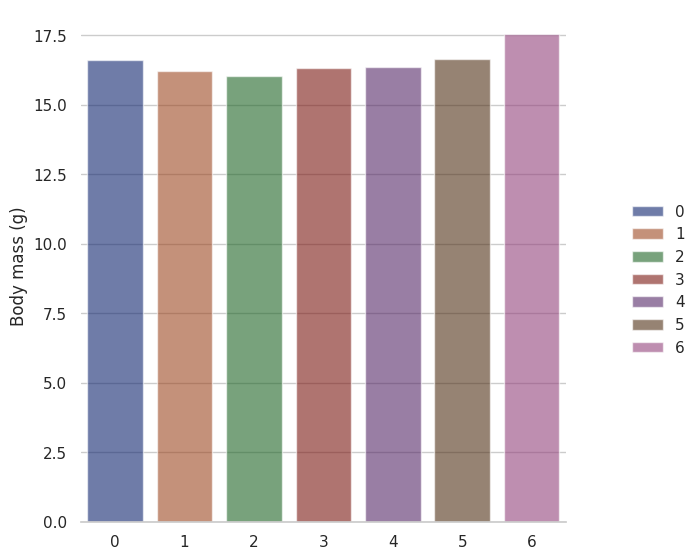

In [13]:
sns.set_theme(style="whitegrid")

# Bar chart
g = sns.catplot(
    data=day_of_week_avg, kind="bar",
    x="drop_off_dow", y="total_amount", hue="drop_off_dow",
    errorbar="ci", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

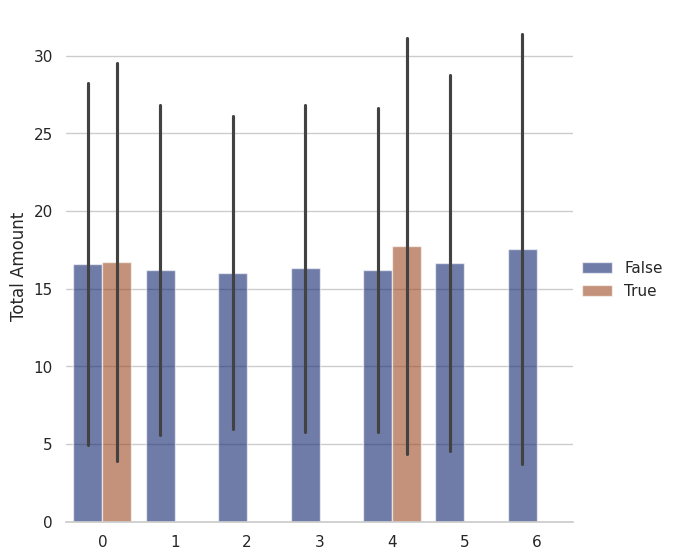

In [15]:
sns.set_theme(style="whitegrid")

# Bar chart
g = sns.catplot(
    data=taxi_df_short, kind="bar",
    x="drop_off_dow", y="total_amount", hue='is_holiday',
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Total Amount")
g.legend.set_title("")

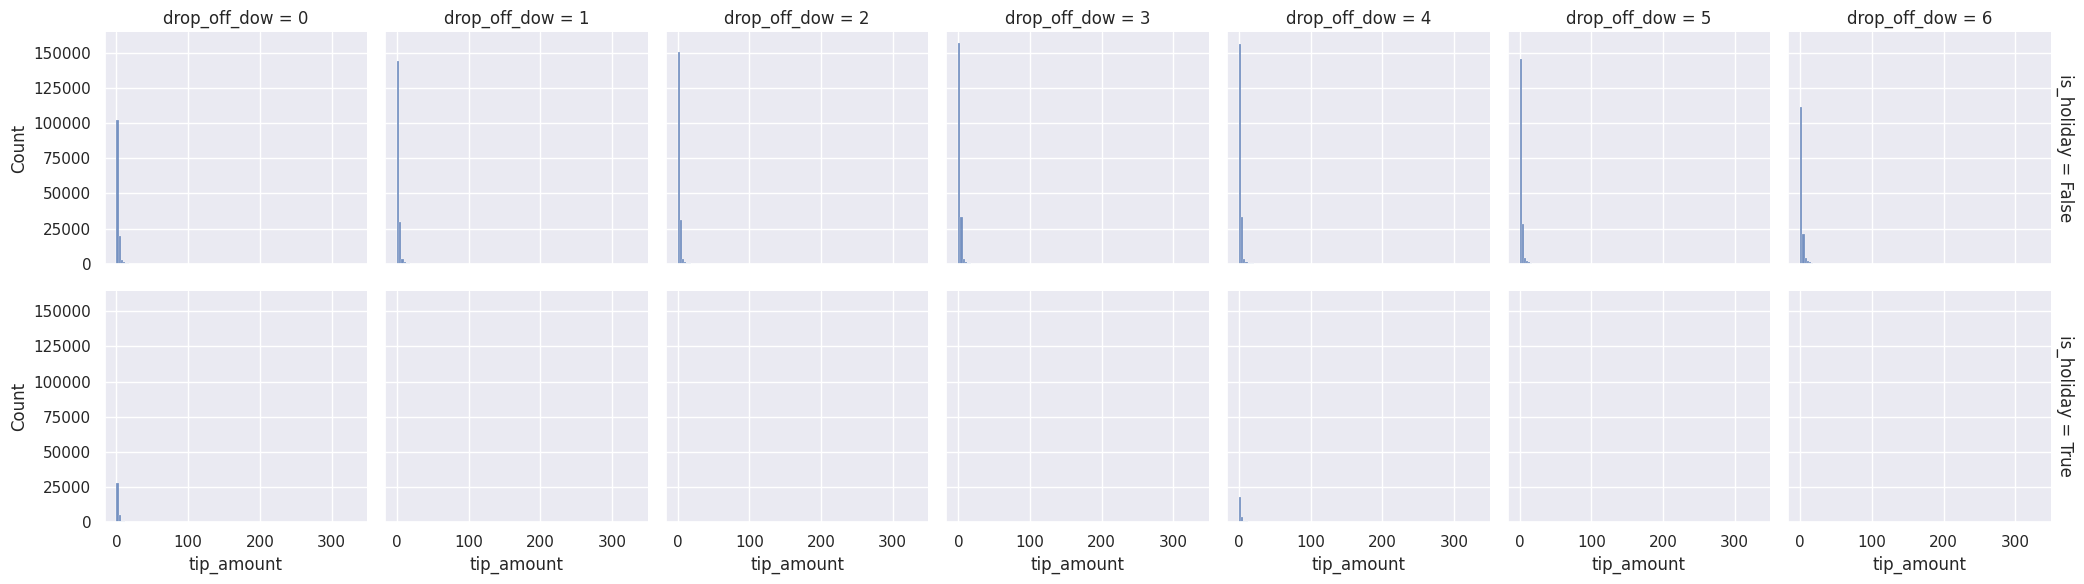